<a href="https://colab.research.google.com/github/joseph-owiti/uva-mcs-general/blob/develop/HW1_Okeno_Storms_Joseph_GML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1 - Adjacency Matrix (20 pts)

Consider an undirected graph G with adjacency matrix A. Denote Ai as the ith row and Aij as the element at row i and column j.

*   How can we compute the number of common neighbors between vertex i and vertex j? (2pts)
*   The number of triangles in the graph G? (4 pts)
*  The number of walks of length k? (4 pts)
* What is challenging about computing the number of paths using the ad- jacency matrix? (5 pts) • How can we d

### Answer


---

## Problem 2. Shortest Paths and Minimum Spanning Tree (20 pts)

* Detail why edges with negative weights are not desirable for computing shortest paths. (6 pts)
*

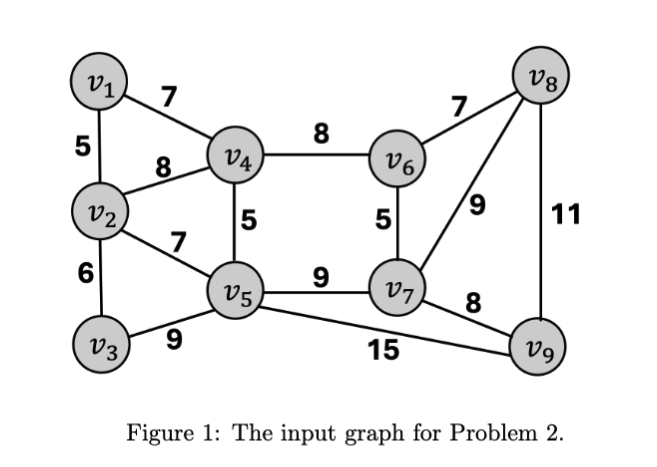